In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
from lib import DihedralAdherence
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from lib.fit_model_on_multiple import fit_lr, predict_lr, fit_rf, plot_md_vs_rmsd, predict_rf
from pathlib import Path
from lib import DihedralAdherence
from lib import PDBMineQuery
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from pathlib import Path
from scipy.stats import linregress, pearsonr
PDBMINE_URL = os.getenv("GREEN_PDBMINE_URL")
PROJECT_DIR = 'casp_da'

In [109]:
mds = []
rmsds = []
PDBMINE_URL = os.getenv("GREEN_PDBMINE_URL")
PROJECT_DIR = 'casp_da'
proteins = [
  'T1024', 'T1030', 'T1030-D2', 'T1024-D1', 'T1032-D1', 'T1053-D1', 'T1027-D1', 'T1029-D1',
  'T1025-D1', 'T1028-D1', 'T1030-D1', 'T1053-D2', 'T1057-D1','T1058-D1', 'T1058-D2'
]

da = DihedralAdherence(
    proteins[1], [4,5,6,7], PDBMINE_URL, PROJECT_DIR, mode='ml', quantile=1,
    weights_file='ml_runs/best_model-kde_16-32_383.pt', device='cpu'
)
da.load_results_da()
da.filter_nas(quantile=0.8)

Initializing T1030 ...
Results already exist
Casp ID: T1030 	PDB: 6poo
Structure exists: 'pdb/pdb6poo.ent' 
UniProt ID: Q8DWZ6


In [104]:
t = 90
values = da.grouped_preds_da.values
da.grouped_preds_da.loc[:] = np.where(np.isnan(da.grouped_preds_da.values), np.nan, np.where(values < t, 1, 0))
da.grouped_preds = da.grouped_preds.set_index('protein_id')
da.grouped_preds['da'] = da.grouped_preds_da.mean(axis=1)
da.grouped_preds = da.grouped_preds.reset_index()
da.grouped_preds['log_da'] = da.grouped_preds['da'].values

Slope: -65.01709218965762, Intercept: 128.96223422564475 R-squared: 0.66217298139081


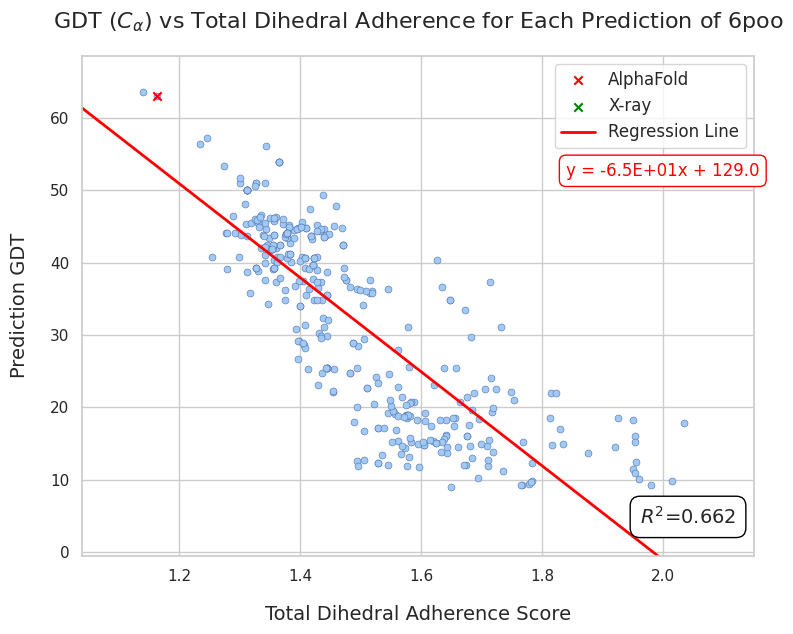

In [110]:
da.plot_da_vs_gdt_simple()

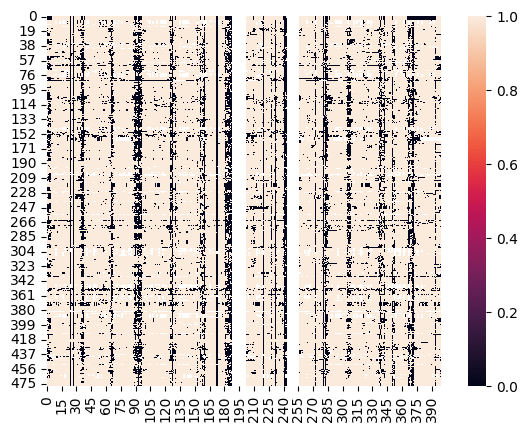

<Axes: >

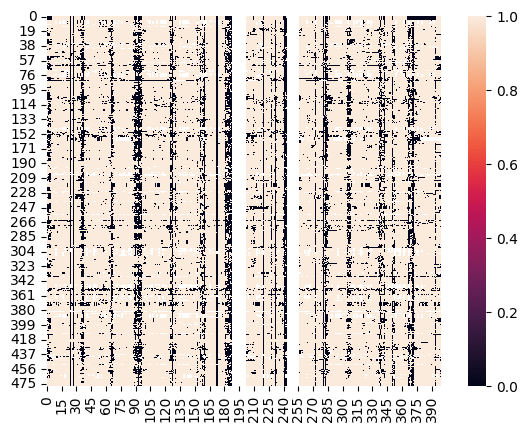

In [49]:
df = da.grouped_preds_da.copy()
das = df.values
t = 30
sns.heatmap(np.where(np.isnan(values), np.nan, np.where(values < 30, 1, 0)))
plt.show()
das[das <= t] = 1
das[das > t] = 0
sns.heatmap(das)